Re-create the following figure using the `mpg` data set.

In [1]:
library('tidyverse')
library('forcats')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [11]:
median_v<- mpg%>% group_by(class) %>% summarize(cty=median(cty))
median_v

`summarise()` ungrouping output (override with `.groups` argument)



class,cty
<chr>,<dbl>
2seater,15
compact,20
midsize,18
minivan,16
pickup,13
subcompact,19
suv,13


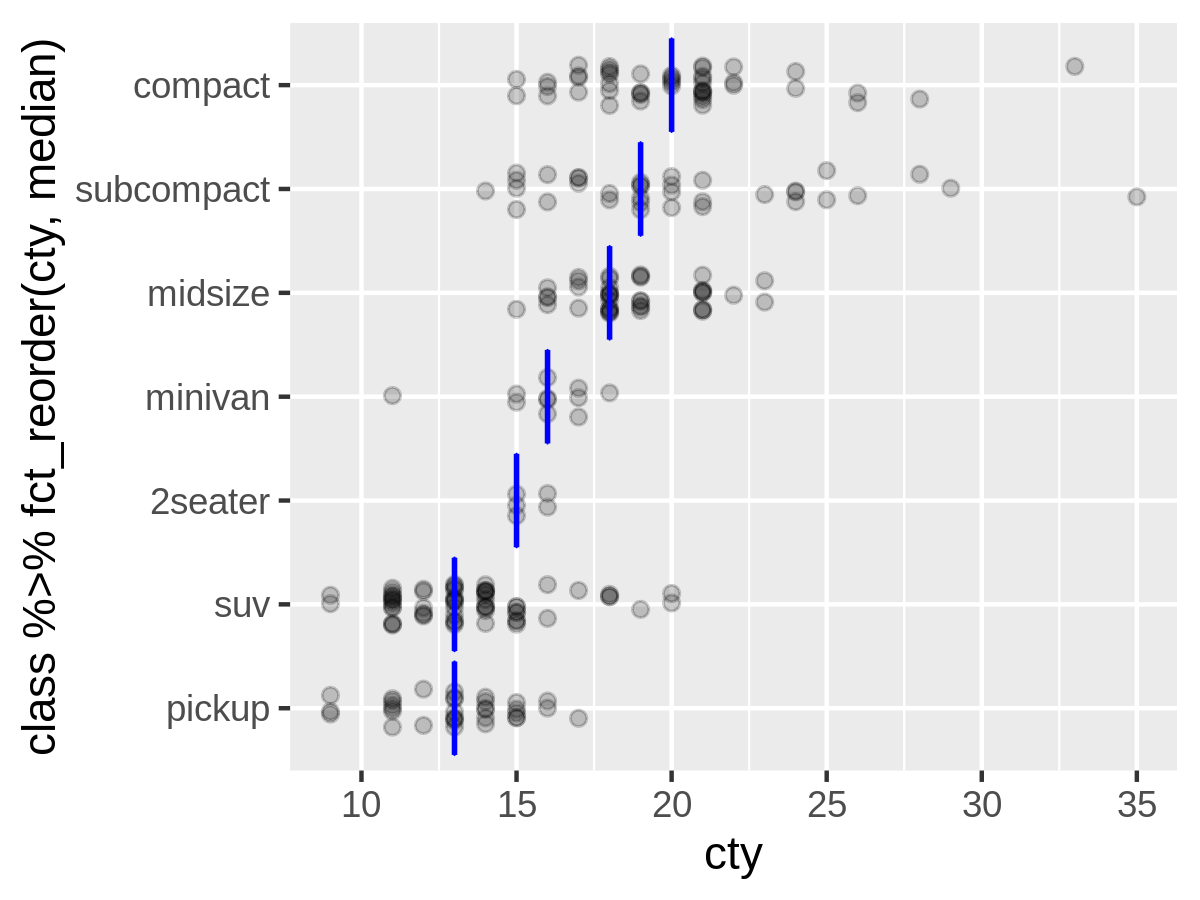

In [30]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=300)
p=ggplot(mpg, aes(x=cty, y=class %>% fct_reorder(cty,median)))
p=p+geom_point(alpha=0.2, position=position_jitter(w=0, h=0.2))
p=p+geom_crossbar(data=median_v, 
                  mapping=aes(xmin=cty, xmax=cty, y=class),
                  size=.25,
                  color="blue")
p